## Implementing Iterators, Iterables and Collections

### Iterables and Iterators
* iterators decouple how we retrieve items from an object from the structure of the object
  + the items might be generated, stored and managed by different structures and mechanisms, such as collection, gnerator, file or sensor data from streaming
  + the retrieval of the items is managed by another type of closely related objects called an iterator
    + the iterator encapsulates the current position in the iterable and has has an iterface that allows us to get the next value and to determine when the underlying iterable is exhausted
    + iterators in Python is known as forward iterators, meaning that they traverse the underlying iterable in a forward direction one item at a time, without jumpping and changing direction
    + the underlying series of elements may be conceptually infinite or unending if the results are produced dynamically by a computation or a sensor rather than retrieved from storage
    + Python also provides reverse iterator, which traverse the items from the end to the beginning.
      + only apply to collections with a finite number of elements with a definite end
* As a quick review of how iterator and iterable works, the following code showed the 3 typical steps to obtain and advance an iterator and get data from an iterable:

```python

# obtain an iterator from iterable
iterator = iter(iterable)

# traverse the iterable to retrieve data by next(iterator)
try:
    item = next(iterator)
    print(item)

# handle the end of the iterable
except StopIteration:
    print("No more items")
    
```    


* Two ways of creating iterables
  + instantiating built-in collections
  + using generators either by generator functions or expressions

In [ ]:
# create iterable by built-in collections
iterable_list = [2, 4, 6, 8, 10]
iterable_tuple = ("orange", "apple", "banana")
iterable_dict = dict(a="alpha", b="bravo", c="charlie")

# by generators

# generator function
def iterable_oceans():
    yield "Arctic"
    yield "Atlantic"
    yield "Indian"
    yield "Pacific"
    yield "Southern"

# generator expression
iterable_squares = (x*x for x in range(10))

#### Iterable and Iterator protocols
* Iterable protocol
  * an iterable object must comply with iterable protocol. 
  * iterable protocol
    + an iterable object can be passed to iter function, which will call the iterable object's \_\_iter\_\_(self) function, and return an iterator object

```python

class MyIterable:

    ...

    def __iter__(self):
        # Must return a new iterator
        # for this iterable
        iterator = MyIterator(self)
        return iterator

iterator = iter(iterable)

item = next(iterator)

```

* Iterator protocol
  * an iterator object must be an iterable object by implementing \_\_iter\_\_() function
  * given an iterable or iterator, you can always obtain an iterator object by passing the object to iter() function
    + In practice, for most iterators, the \_\_iter\_\_(self) method returns itself
  * iterator is also required to work with the next built-in function
    + whenever an iterator is passed to built-in next function, the \_\_next\_\_() function of the iterator object is called.
      + the function of \_\_next\_\_ is to traverse the item and stop it when all elements have been traversed  

#### Motivating iterators: Tree Traverse
* we can use an expression tree to process an expression
  + here is the infix notation of an expression (a + b) * (c - d)
  + we can express this as a binary tree
  + the node value of the binary tree can be stored as a sequence
  
  ```python
  expr_tree = ["*", "+", "-", "a", "b", "c", "d"]
  ```  
* the evaluation will be the following:
  + leaf nodes a, b get combined by "+", and return results to "+" node
  + leaf nodes c, d get combined by "-", and return results to "-" node
  + nodes "+ and "\-" return results to "\*" where the results got multiplied and returned
* we can iterate the expr_tree using an iterator, as shown in the following code example  

In [1]:
expr_tree = ["*", "+", "-", "a", "b", "c", "d"]
iterator = iter(expr_tree)
for el in iterator:
    print(el) 

*
+
-
a
b
c
d


#### Storage-order iterator for a sequence
* here we implement a level order iterator to iterate the expre_tree list
  + self.\_sequence store the input expr\_tree list
  + self.\_index to store the state, which is the position of the current element
* this home-built iterator was tested by
  + if we can traverse the iterator
  + if we can use this iterator to the built-in String.join() function, which expects an iterable

In [2]:
#version 1, a simple iterator based on list
class LevelOrderIterator:
    
    def __init__(self, sequence):
        self._sequence = sequence
        
        # internal state
        self._index = 0
        
    def __next__(self):
        if self._index >= len(self._sequence):
            raise StopIteration
        result = self._sequence[self._index]
        self._index += 1
        return result
    
    # for most iterator, we return itself, so it can
    # be used everywhere an iterable is required
    def __iter__(self):
        return self       

In [3]:
# test we can iterate expr_tree
expr_tree = ["*", "+", "-", "a", "b", "c", "d"]

# instead of using iter(), we instantiate an iterator from the list
iterator = LevelOrderIterator(expr_tree)
for el in iterator:
    print(el)

*
+
-
a
b
c
d


In [4]:
# test if we can use our home-made iterable to the String.join function
iterator = LevelOrderIterator(expr_tree)
" ".join(iterator)

'* + - a b c d'

#### Using Level order iterator for perfect binary tree
* we modify the code to store and retrieve data of perfect binary tree
* the number of elements is 2^n -1, which we use a predicate function to check
  + the predicate function uses (n+1)&n ==0 and n!=0 to make sure n = 2^x -1

In [5]:
#version 2, modified iterator for perfect binary tree

# a predicate function to check the squence has length 2^n -1
def _is_perfect_length(sequence):
    """
    True if sequence has length 2^n -1, otherwise False
    """
    n = len(sequence)
    return ((n+1)&n == 0) and (n != 0)
    
class LevelOrderIterator:
    
    def __init__(self, sequence):
        if not _is_perfect_length(sequence):
            raise ValueError(
                f"Sequence of of length {len(sequence)} does not represent "
                f"a perfect binary tree with length 2^n -1"
            )
        self._sequence = sequence
        
        # internal state
        self._index = 0
        
    def __next__(self):
        if self._index >= len(self._sequence):
            raise StopIteration
        result = self._sequence[self._index]
        self._index += 1
        return result
    
    # for most iterator, we return itself, so it can
    # be used everywhere an iterable is required
    def __iter__(self):
        return self       

In [13]:
non_tree = "+ 24 12 -".split()
try:
    iterator = LevelOrderIterator(non_tree)
except ValueError as e:
    print(e)

Sequence of length 4 does not represent a perfect binary tree with length 2ⁿ - 1


#### Use Pre-order iterator for perfix binary tree

In [14]:
from tree_util import _is_perfect_length, _left_child, _right_child

class PreOrderIterator:

    def __init__(self, sequence):
        if not _is_perfect_length(sequence):
            raise ValueError(
                f"Sequence of length {len(sequence)} does not represent "
                "a perfect binary tree with length 2ⁿ - 1"
            )
        self._sequence = sequence
        self._stack = [0]


    def __next__(self):
        if len(self._stack) == 0:
            raise StopIteration

        index = self._stack.pop()
        result = self._sequence[index]

        # Pre-order: Push right child first so left child is
        # popped and processed first. Last-in, first-out
        right_child_index = _right_child(index)
        if right_child_index < len(self._sequence):
            self._stack.append(right_child_index)

        left_child_index = _left_child(index)
        if left_child_index < len(self._sequence):
            self._stack.append(left_child_index)

        return result

    def __iter__(self):
        return self

In [15]:
expr_tree = ["*", "+", "-", "a", "b", "c", "d"]
iterator = PreOrderIterator(expr_tree)
" ".join(iterator)

'* + a b - c d'

#### Use in-order iterator for perfix binary tree
* this allows us to translate an infix expression back to the calculation order
* this is the same as the classic Leetcode in-order tree traverse

In [16]:
from tree_util import _is_perfect_length, _left_child, _right_child

class InOrderIterator:

    def __init__(self, sequence):
        if not _is_perfect_length(sequence):
            raise ValueError(
                f"Sequence of length {len(sequence)} does not represent "
                "a perfect binary tree with length 2ⁿ - 1"
            )
        self._sequence = sequence
        self._stack = []
        self._index = 0

    def __next__(self):
        if (len(self._stack) == 0) and (self._index >= len(self._sequence)):
            raise StopIteration

        # Push left children onto the stack while possible
        while self._index < len(self._sequence):
            self._stack.append(self._index)
            self._index = _left_child(self._index)

        # Pop from stack and process, before moving to the right child
        index = self._stack.pop()
        result = self._sequence[index]
        self._index = _right_child(index)
        return result

    def __iter__(self):
        return self

In [17]:
expr_tree = ["*", "+", "-", "a", "b", "c", "d"]
iterator = InOrderIterator(expr_tree)
" ".join(iterator)

'a + b * c - d'

#### Summary of the Tree traversal
* A list provides the underlying data structure to store data, but it doesn't know about tree iterators
* Tree iterators don't know directly about list
* Sequence protocol was used by tree iterators to access the underlying list 

#### Filtering Iterators
* how to work with expressions/collections containing imperfect binary trees?
  + we can add sentinel nodes to represent empty nodes to make it a perfect binary tree
    + we can use None as sentinel node, but that prevent us to use None as a legitiment tree node
    + we can create a new node type to represent sential nodes
      + it is the identity, rather than its type, that is important in representing sential nodes
* in the following code, we create missing object to represent sential object, and implement a SkipMissingIterator to filter out missing nodes
  + this implementation takes the advantage of the built-in iterator of the input iterable to check the stop condition and raise StopInteration exception when all elements have been exhaustive
  + since the input is any iterable, we can chain iterables together. As shown in the code, we chained InOrderIterator(expr_tree), which is an Iterable, with SkipMissingIterator
    + note that we have to chain these two iterables in this order, since InOrderIterator requires to have an input with perfect binary tree length, while SkipMissingIterator will filter out some empty nodes, that results in an Iterable with an imperfect binary tree length 

In [18]:
missing = object()


class SkipMissingIterator:

    def __init__(self, iterable):
        self._iterator = iter(iterable)

    def __next__(self):
        while True:
            item = next(self._iterator)
            
            # use identity test to identify missing elements
            if item is not missing:
                return item

    def __iter__(self):
        return self


In [22]:
expr_tree = ["+", "r", "*", missing, missing, "p", "q"]
iterator = SkipMissingIterator(expr_tree)
print(list(iterator))

iterator = SkipMissingIterator(InOrderIterator(expr_tree))
print(" ".join(iterator))

['+', 'r', '*', 'p', 'q']
r + p * q


#### Transforming Iterators
* in the following code example, an iterator was used to transform input Iterables where a Dictionary was used to transform the input items as keys to values

In [23]:
typesetting_table = {
      "-": "\u2212",  # Minus sign
      "*": "\u00D7",  # Multiplication sign
      "/": "\u00F7",  # Division sign
  }


class TranslationIterator:

    def __init__(self, table, iterable):
        self._table = table
        self._iterator = iter(iterable)

    def __next__(self):
        item = next(self._iterator)
        return self._table.get(item, item)

    def __iter__(self):
        return self    

In [24]:
missing = object()
m = missing
expr_tree = [
              "-",
    
       "*",              "/",
    "p",   "q",        "r",  "+",
    m, m,  m, m,      m, m, "s", "t"
]

iterator = TranslationIterator(
    typesetting_table,
    SkipMissingIterator(InOrderIterator(expr_tree))
)

" ".join(iterator)

'p × q − r ÷ s + t'

#### Iterables
* in the following code example, we built an Iterable, PerfectBinaryTree, which returns an iterator by chaining the iterators we built previously in its \_\_iter\_\_() method.
* PerfectBinaryTree accepts any iterables, and convert it to a tuple, check the length of the tuple to ensure it has the length of a perfect binary tree 
* when we obtain the iterator from the built-in iter() function, we can traverse the iterables we input into the PerfectBinaryTree constructor
* Iterators are usually used indirectly, through iterable-consuming functions and for-loops

In [25]:
class PerfectBinaryTree:

    def __init__(self, breadth_first_items):
        self._sequence = tuple(breadth_first_items)
        if not _is_perfect_length(self._sequence):
            raise ValueError(
                f"Iterable series of length {len(self._sequence)} does not represent "
                "a perfect binary tree with length 2ⁿ - 1"
            )

    def __iter__(self):
        return SkipMissingIterator(PreOrderIterator(self._sequence))

In [28]:
tree = PerfectBinaryTree("+ * / u v w x".split())
iterator = iter(tree)
print(iterator)

# using any method that accepts Interable as input to traverse the iterable
# note that our iterator is also an Iterable!
print(" ".join(iterator))

# we can directly use tree, which is our Iterable, to the string.join()
print(" ".join(tree))

# we can use for loop, which calls the __iter__ method of the iterable and its next() method
for item in tree:
    print(item)

+ * u v / w x
+ * u v / w x
+
*
u
v
/
w
x


#### The Alternative Iterable Protocol
* traverse the Iterable using \_\_getitem\_\_
  + called to implement evaluation of sequence\[index\]
  + the accepted keys should be integers
  + if a value outside of teh range of sequence indices, IndexError should be raised.
  + An example code is shown below:
  
  ```python
class MyAlternativeIterable:

    ...

    def __getitem__(self, index):
        if index >= self.number_of_items():
            raise IndexError
        return self.get_element_at(index)
    ```
  + since we don't implement the \_\_iter\_\_() method, when we call iter(MyAlternativeIterable), iter will check \_\_getitem\_\_() method and create an iterator for us 
    + the created iterator has an iternal counts which increments as we retrieve items by passing the iterator to next()
* the following cell showed a code example
  + we put the code for validating start, end and num_steps in dunder init() method
  + we then implement the dunder getitem() method to check the out of index conditions, if so raise IndexError, otherwise, return the value
    + note that \_\_getitem\_\_(self, index) method has an index argument that will automatically increment each time next method is called. We just need to test and use this index value for each call. 
    + we don't need to modify or increment this index value
  + since we implemented \_\_getitem\_\_() method, RationalRange is considered as an Iterable class, so we can use the for loop to traverse the items.
    + as for all Iterables, the for loop will call the iter() and next() method to traverse items

In [1]:
from fractions import Fraction


class RationalRange:

    def __init__(self, start, stop, num_steps):
        if num_steps != int(num_steps):
            raise ValueError(f"num_steps {num_steps} does not have integral value")
        if num_steps < 1:
            raise ValueError(f"num_steps {num_steps} is not positive")
        self._start = Fraction(start)
        self._num_steps = num_steps
        self._step = Fraction(stop - start, num_steps)

    def __getitem__(self, index):
        if not (0 <= index < self._num_steps):
            raise IndexError
        return self._start + index * self._step

In [2]:
r = RationalRange(5, 13, 6)
iterator = iter(r)
print(next(iterator))
print(next(iterator))
print(next(iterator))

5
19/3
23/3


In [3]:
r = RationalRange(5, 13, 6)
for item in r:
    print(item)
    
[float(item) for item in r] 
print("sum of r is ", sum(r))

5
19/3
23/3
9
31/3
35/3
sum of r is  50


#### Extended iter() form
* the two argument form of iter is the following:

```python

iterator = iter(callable, sentinel)

```

  + the first argument is a zero-argument callable
    + it is invoked once per iteration
  + the second argument is a value
    + iteration will end when the callable produces this value
* this is usually used to create infinite sequence iterators out of normal functions 
  + for example, we can use extended from to read lines of a file untio a specified line is read
  + we can use datetime.now to be repeatedly called for infinite times to query the time
  + the final code example uses the timestamp and free\_space() function to generate the real time disk free space

In [4]:
with open("end_terminated_file.txt", "rt") as f:
    lines = iter(lambda: f.readline().strip(), "END")    
    readings = [int(line) for line in lines]
print(readings) 

# using iter to generate timestamps
import datetime
timestamps = iter(datetime.datetime.now, None)
print(next(timestamps))
print(next(timestamps))
print(next(timestamps))


[291, 149, 17, 31, 547, 2069]
2023-01-13 20:28:49.342081
2023-01-13 20:28:49.342081
2023-01-13 20:28:49.342081


In [5]:
from pathlib import Path
import time
from shutil import disk_usage

# define a free space readings iterator to read disk free sapce in real time
cwd = Path.cwd()
def free_space():
    return disk_usage(cwd).free 
free_space_readings = iter(free_space, None)                                
                                                              
# combine the free_space_readings and timestamp iterables
# to print the free space at each timestamp
for timestamp, free_bytes in zip(timestamps, free_space_readings):          
    print(timestamp, free_bytes)
    time.sleep(1.0)     

2023-01-13 20:28:53.076696 83353411584
2023-01-13 20:28:54.090972 83353407488
2023-01-13 20:28:55.094720 83353407488
2023-01-13 20:28:56.097647 83353407488
2023-01-13 20:28:57.113246 83353407488
2023-01-13 20:28:58.114816 83353407488
2023-01-13 20:28:59.124908 83353407488
2023-01-13 20:29:00.133596 83353403392


KeyboardInterrupt: 

#### Collection Protocols
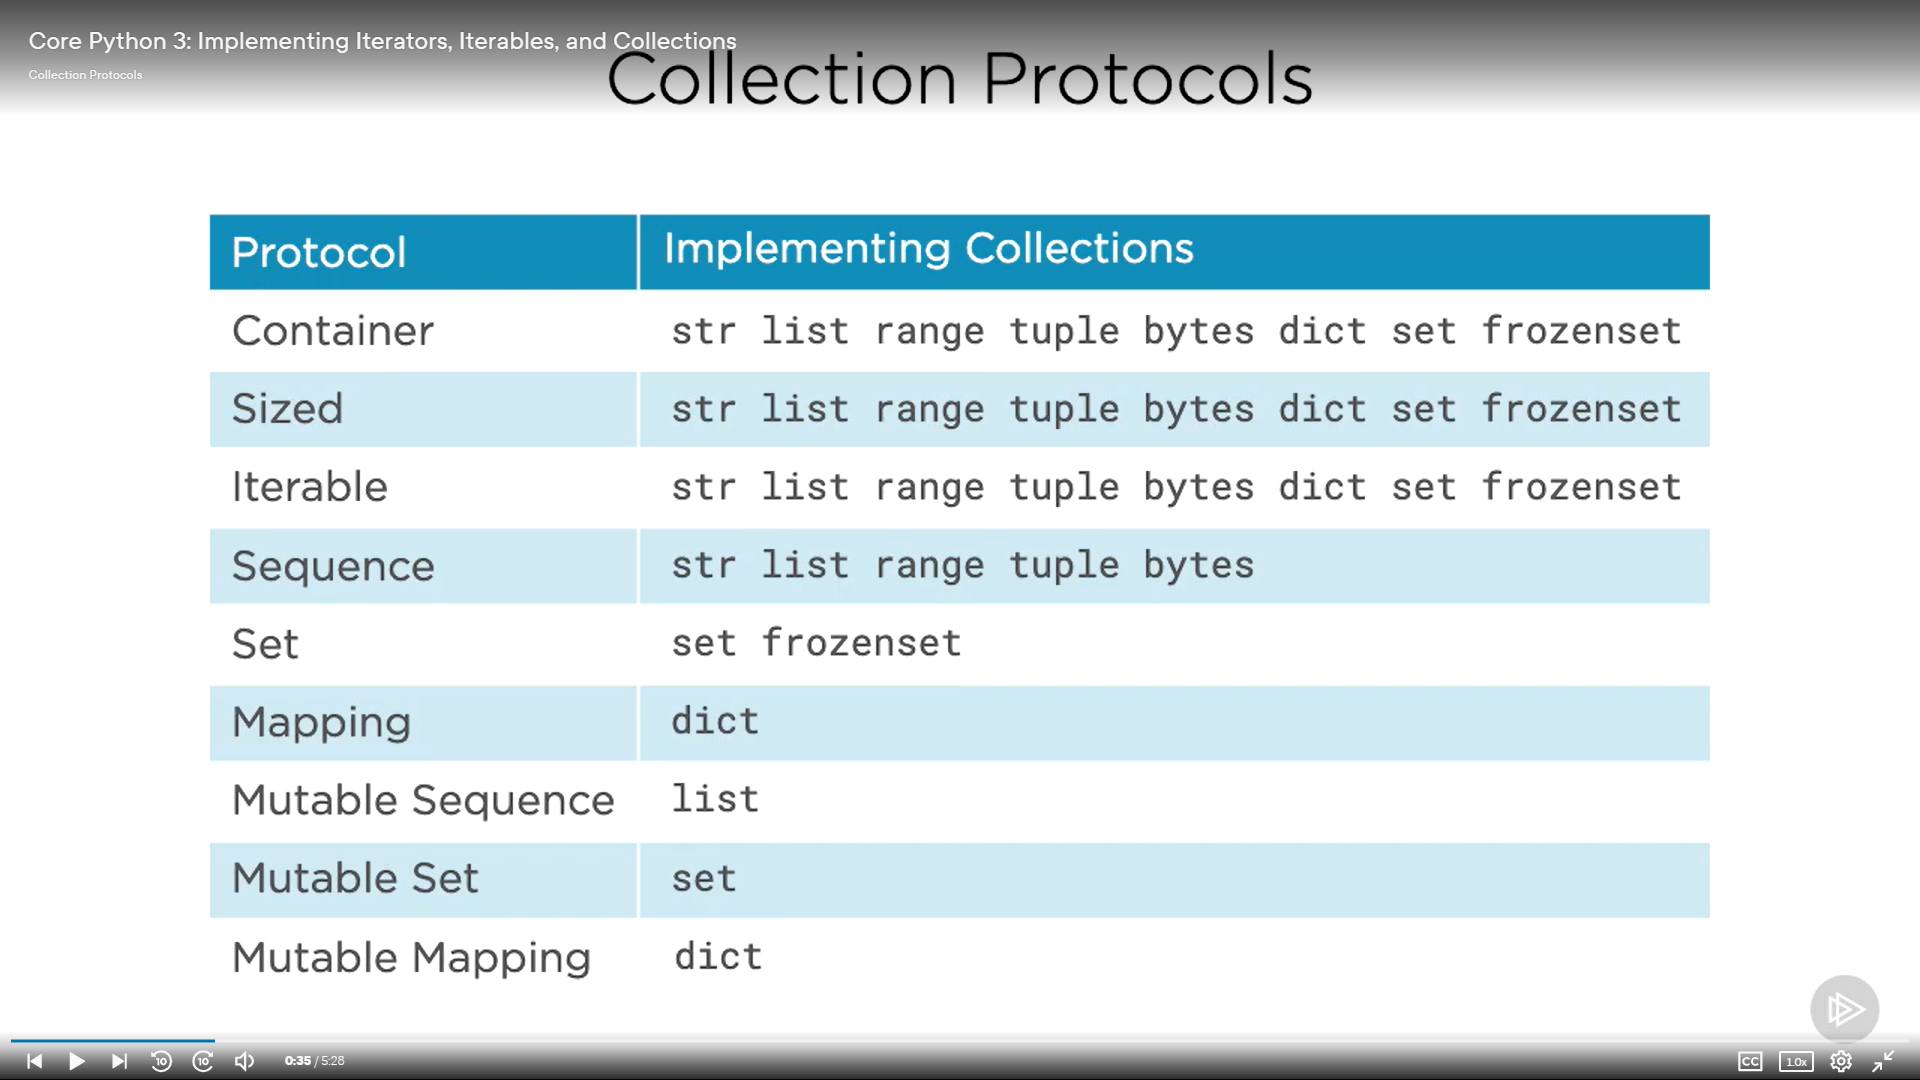

* protocols: to implement a protocol, objects must support certain operations
  + usually (but not always) these operations are implemented as dunder methods
* most collections implement container, sized and iterable
* all except dict, set, and frozenset are sequences
* container protocol
  + membership testing using the in and not in operators
* Sized protocol
  + determine the number of elements with len(s)
* Iterable
  + can produce an iterator with iter(s)
  
  ```python
  for item in iterable:
        do_something(item)
  ```
  
  + Sequence protocol is quite rich and allows us to:
    + retrieve elements by index
      + item = seq\[index\]
    + find items by value
      + index = seq.index(item)
    + count the number of items with a particular value
      + num = seq.count(item)
    + produce a reverse iterator
      + r = reversed(seq)
  + Set protocol implements set algebra operations
    + subset, superset
    + proper subset, intersection
    + equal, union
    + not equal, symmetric difference
    + proper superset, difference
  + Mapping protocol: associate hashtable keys with values
    + implemented by Dict type (getter and setter)    

#### Code example to build a SortedFrozenSet
* A collection which is a sized, iterable, sequence container of a set of distinct items, and constructible from an iterable
* we will develop the code using TDD
* Test Construction
  + we create class TestConstruction(unnittest.TestCase) for a set of tests of class constructor
  + in test_construct_no_args(), we test that we can instantiate the object without any arguments, this is consistent to other Python collections. To pass this test, we set the items=None in the class dunder init method
* Test Container protocol
  + Container protocol: membership test using in and not in. The operation delegates to the special method of dunder contains. If not supported, fallback to iterable protocol
  + We create a class TestContainerProtocol(unittest.TestCase) for all the tests of Container protocol tests
  + within this class, we define a setup fixture to generate self.s as the test data. This fixture will run on each test function to make sure a fresh data is generated for each test
  + for dunder contains() method, we use the high level in operator of list, rather than directly calling the dunder contains method of the self.\_items to utilize the optimization that Python does for membership check

* Test Sized Protocol: returns the number of items using len(sized)
  + must not consume or modify collection
  + len() delegate to the special method \_\_len\_\_()
  + test_with_duplicates tests the set like property, where duplicated elements only count once
    + to pass this test, we changed self.\_items from list to set
    
* Test Iterable protocol: returns an iterator using iter(iterable)
  + iter() delegate to the special method \_\_iter\_\_()
  + fallback to the alternative iterable protocol with \_\_getitem\_\_()
  + test_iter tests that an iterator is returned from the SortedFrozenSet instance, and their elements are ordered
    + to pass this test, we changed the self.\_items to be sorted based on the set. Therefore, we maintain both uniquness and the order of the elements 

#### Test Sequence Protocol
* implies container, sized, iterable
* retrieve an item by index:
  + item = seq\[index\]
* optionally retrieve items by slicing:
  + items = seq\[start:stop\]
* produce a reverse iterator:
  + r = reversed(seq)
* locate an item by value:
  + index = seq.index(item)
* count items:
  + num = seq.count(item)  

##### Implementation of indexing to retrieve an item by index
* indexing operation calls special method dunder getitem that accept an integer index
  + this method must handle the index\_out\_of\_range() case, to raise IndexError()
  + if the index is not out of range, return the value at the specified index
  + we can easily implement this by delegating dunder getitem method to self.\_items\[index\]
* slicing is an optional extension of indexing behavior for sequences
  + this is also delegated to self.\_items\[index\]. The difference between a single argument and slicing argument is that if a single integer is input, index is an integer, otherwise, index is a slice
  + here in this operation, we expect to return a SortedFrozenSet, rather than a list. Therefore, we check if the index is a slice instance, if so, we construct a SortedFrozenSet and return it, otherwise, we direct return the value at that integer index
  + all the tests for slicing were failed, even though each assertion the same SortedFrozenSet structures and attribute values on both sides. This is because we didn't implement the equal op for the comparison of two SortedFrozenSet objects
    + python's default equality test is inherited from object - it checks for reference equality (equality of identity) rather than equivalence (equality of value)
    + the list equality test has oeverriden the object equality test method, and is value based
* to prepare for the test for slicing, we created TestEqualityProtocol class to test equality of two SortedFrozenSet objects.
  + we use assertTrue and assertFalse and test the two SortedFrozenSet objects using equal sign
  + to pass the test, we delegate the dunder eq method to the list's equal operation. In addition, if the argument to compare with the self object is not a SortedFrozenSet object, we return NotImplemented
  + we also created TestInequalityProtocol class to test inequality
  
* Hashable Protocol
  + Hashable objects can be passed to the built-in hash(hashable) function
  + hash(obj) returns an integer hash-code
  + hashable objects can be used as a dictionary key, or as set elements
  + immutable, value equality comparable objects should be hashable
  + mutable objects should disable hashing by setting \_\_hash\_\_ = None to prevent using them as keys
  + this is implemented by special method dunder \_\_hash\_\_()
  + in our example, we have made our class equality comparable, and our class is immutable, so we should implement hashing
  + without overriding \_\_hash\_\_() method, we obtain a TypeError of unhashable type 'SortedFrozenSet'. This is because we are using the default hash function of object
  + an easy way to make a hash-code from multiple objects is to put those objects in a tuple, and take a hash of that
  + the requirement is that the equal objects must return the same hashcode, and non-equal objects may return different hashcode
  + we obtained an error since list is unhashable. Realiing that our FrozenSet is built on its \_items as a list, which is mutable, it is better to convert \_.item from a list to an immutable collection, such as a tuple. We did that conversion using tuple() in \_\_init\_\_() function
  
* Reversing a sequence
  + the built-in reversed() function returns an iterator that yields items in reversed order:
  iterator = reversed(sequence)
    + the built-in reverse() function delegates to special method dunder reversed()
    + fallback to \_\_getitem\_\_(index) and \_\_len\_\_() if supported, to traverse from the end index, and decrease the index for each iteration
  + we put the test_reversed() in Sequence protocol tests, and it passed due to the previous implementation of \_\_getitem\_\_(index) and \_\_len\_\_()  
  
* indexing test
  + if the correct index is returned given a value of the element
  + if ValueError is raised, given an element value that doesn't exist in the set
  + we can get an implementation of this method by inheriting abc.Sequence class
    + Sequence inherits from Collection(Sized, Iterable, Container)
    + Sequence has two abstract method a concrete class needs to implement: dunder getitem and dunder len, which we have implemented
    + we will automatically inherit the mixin methods of dunder contains, dunder iter, dunder reversed, index and count methods
  
* The extended Sequence Protocols
  + Sequence protocol has some optional extensions
  + these functions are neither enforced nor provided by the sequence ABC
  + these functions can be classified into two categories:
    + functions for both immutable and mutable sequences:
      + concatenation with \_\_add\_\_ and \_\_radd\_\_
      + repetition with \_\_mul\_\_ and \_\_rmul\_\_
    + functions only for mutable sequences: 
      + in-place concatenation with \_\_iadd\_\_
      + in-place repetition with \_\_imul\_\_
      + in-place append, extend, insert, pop, reverse, remove and sort
  + in our code example, we only implemented extensions for immutable sequences
  + for concatenation, we use the set operations to find the union elements of two SortedFrozenSets
    + since both objects may contain a large amount of data, we use chain function from itertools module to concatenate the \_items of the two objects together, to the constructor of SortedFrozenSet
  + for repetition, we return self if rhs >0 since our class is immutable. If rhs <=0, we return an empty SortedFrozenSet() object  
  

### Refactoring to imporve performance
* refactor: after TDD and all tests passed, the correctness-preserving transformations of the code which improves some other quality of the system. 
  + Most often, we target maitainability and elegance
  + in the following code example, we focus on performance
  ![image.png](attachment:image.png)
  
  + our SortedFrozenSet inherits methods of dunder contains, index and count from ABC Sequence, which are general implementations, and didn't consider our particular class implementation, and therefore, may not be the optimized in terms of performance.
    + since items in SortedFrozenSet are sorted and unique, we can take advantage of these properties and optimize the count() function from O(n) to O(logn)
    + to establish the test data, we use data generated from a generator, recaman, and use islice from itertools to slice a set of numbers from ecaman for performance evaluation and comparison
    + when we call count on s to count the number of elements with values in the range from 0 to 1000, it will always search all the 613 elements for each of the 1000 elements, which sums upto 613000 comparisons. It took about 20 seconds to find the count for all these elements
    + since we know the elements are unique, so counts should be either 0 or 1. In addition, the elments in s is sorted. Therefore, we can use binary sort to speed up the implementation of count() method
    + in the following example code, we override the count() method. for each search, we just use binary search to check if it is in the SortedFrozenSet object, and if so, returns 1, otherwise, returns 0. Therefore, we only need to search log(613) times, compared to previously 613000 times, which improved the performance from 20 seconds to 0.19 seconds, a 100 times improvement.
    + we then refactor dunder contains method to use this logic
    + we also use binary search to find the index of an element. If the element was found, we returned the index, otherwise, we raise ValueError indicating the element was not found
    + finally as a refactor to reduce code duplication, we can use self.index in dunder contains implmentation
* up to this point, since we have implemented all of the methods in Sequence, we don't need to inherit Sequence anymoer, so we delete the inheritance from the code, and still passed all the tests. We keep the inheritance of Sequence so that we can pass the issubclass test of Sequence
* now we used issubclass test to check if our SortedFrozenSet is a subclass of Sequence, Container, Hashable, Iterable and Sized

#### Set Protocol (collections.abc.Set)
  + inherits from Collection(Sized, Iterable, Container)
  + Abstract methods (dunder contains, dunder iter and dunder len)
  + mixin methods:
    + the following dunder methods:
      + le, lt, eq, ne, gt, ge
      + and, or, sub, xor
    + isdisjoint 
  + tests
    + TestRelationalSetProtocol tests infix operators
    + TestSetRelationalMethods test named method equivalence of infix operators, including subset, superset and disjoint
    + TestOperationsSetProtocol tests set algebra by infix operators such as &, |, ^ and -, corrsponding to duder and, dunder or, dunder xor and dunder sub
    + TestSetOperationsMethods tests set algebra by named metods, such as intersection, union, symmetric_difference, and difference
  + to implement SortedFrozenSet class, we inherit both Sequence and Set from abc module 
  + noted that abc.Set does not provide implementation for named methods of set operations, and we need to implement them 
    + to implement, we first convert the input iterables to SortFrozenSet object using its constructor, and then delegate to the corresponding infix method from the abc.Set class

In [107]:
from collections.abc import Sequence, Container, Iterable, Sized, Hashable, Set
from itertools import chain
from bisect import bisect_left

class SortedFrozenSet(Sequence, Set):
    
    def __init__(self, items=None):
        self._items = tuple(sorted(
            set(items) if (items is not None)
            else set()
        ))

#     using contains method from tuple       
#     def __contains__(self, item):
#         return item in self._items
    
#     using binary search as a direct implementaion
#     def __contains__(self, item):
#         index = bisect_left(self._items, item)
#         return (index != len(self._items)) and self._items[index] == item
        
    # implementation by calling index() method to reduce code duplications
    def __contains__(self, item):
        try:
            self.index(item)
            return True
        except ValueError:
            return False
    
    def __len__(self):
        return len(self._items)
    
    def __iter__(self):
        return iter(self._items)
    
    def __getitem__(self, index):
        result = self._items[index]
        return (
            SortedFrozenSet(result)
            if isinstance(index, slice)
            else result
        )
    
    def __repr__(self):
        return "{type}({arg})".format(
            type=type(self).__name__,
            arg=(
                "[{}]".format(
                    ", ".join(
                        map(repr, self._items)
                    )
                )
                if self._items else ""
            )
        )

    
    def __eq__(self, rhs):
        if not isinstance(rhs, type(self)):
            return NotImplemented
        return self._items == rhs._items
    
    def __hash__(self):
        return hash(
            (type(self), self._items)
        )
    
    def __add__(self, rhs):
        if not isinstance(rhs, type(self)):
            return NotImplemented
        return SortedFrozenSet(
            chain(self._items, rhs._items)
        )
    
    def __mul__(self, rhs):
        return self if rhs > 0 else SortedFrozenSet()
    
    def __rmul__(self, lhs):
        # use the mul operation, just put lhs as rhs
        return self * lhs
    
    def count(self, item):
        return int(item in self)
    
    def index(self, item):
        index = bisect_left(self._items, item)
        if (index != len(self._items)) and self._items[index] == item:
            return index
        raise ValueError(f"{item!r} not found")
        
        
    def issubset(self, iterable):
        return self <= SortedFrozenSet(iterable)

    def issuperset(self, iterable):
        return self >= SortedFrozenSet(iterable)

    def intersection(self, iterable):
        return self & SortedFrozenSet(iterable)

    def union(self, iterable):
        return self | SortedFrozenSet(iterable)

    def symmetric_difference(self, iterable):
        return self ^ SortedFrozenSet(iterable)

    def difference(self, iterable):
        return self - SortedFrozenSet(iterable)
    
        

In [108]:
import unittest

class TestConstruction(unittest.TestCase):
    
    def test_construct_empty(self):
        s = SortedFrozenSet([])
        
        
    def test_construct_from_non_empty_list(self):
        s = SortedFrozenSet([7, 8, 3, 1])

    def test_construct_from_an_iterator(self):
        items = [7, 8, 3, 1]
        iterator = iter(items)
        s = SortedFrozenSet(iterator)
        
    # construct the instance without argument
    # this is consistent to other Python collections
    def test_construct_no_args(self):
        s = SortedFrozenSet()

class TestContainerProtocol(unittest.TestCase):
    
    def setUp(self):
        self.s = SortedFrozenSet([6, 7, 3, 9])
        
    def test_positive_contained(self):
        self.assertTrue(6 in self.s)
        
    def test_negative_contained(self):
        self.assertFalse(2 in self.s)
        
    def test_positive_not_contained(self):
        self.assertTrue(5 not in self.s)
        
    def test_negative_not_contained(self):
        self.assertFalse(3 not in self.s)
        
    def test_protocol(self):
        self.assertTrue(issubclass(SortedFrozenSet, Container))
        
class TestSizedProtocol(unittest.TestCase):
    
    def test_empty_with_default(self):
        s = SortedFrozenSet()
        self.assertEqual(len(s), 0)
        
    def test_empty(self):
        s = SortedFrozenSet([])
        self.assertEqual(len(s), 0)
        
    def test_one(self):
        s = SortedFrozenSet([42])
        self.assertEqual(len(s), 1)
        
    def test_ten(self):
        s = SortedFrozenSet(range(10))
        self.assertEqual(len(s), 10)
        
        
    def test_with_duplicates(self):
        s = SortedFrozenSet([5, 5, 5])
        self.assertEqual(len(s), 1)
        
    def test_protocol(self):
        self.assertTrue(issubclass(SortedFrozenSet, Sized))    
        
        
class TestIterableProtocol(unittest.TestCase): 
    
    def setUp(self):
        self.s = SortedFrozenSet([7, 2, 1, 1, 9])
        
    def test_iter(self):
        iterator = iter(self.s)
        self.assertEqual(next(iterator), 1)
        self.assertEqual(next(iterator), 2)
        self.assertEqual(next(iterator), 7)
        self.assertEqual(next(iterator), 9)
        self.assertRaises(
          StopIteration,
            lambda: next(iterator)
        )
        
    def test_for_loop(self):
        expected = [1, 2, 7, 9]
        index = 0
        for item in self.s:
            self.assertEqual(item, expected[index])
            index += 1
        
    def test_protocol(self):
        self.assertTrue(issubclass(SortedFrozenSet, Iterable))
        
class TestSequenceProtocol(unittest.TestCase):

    def setUp(self):
        self.s = SortedFrozenSet([1, 4, 9, 13, 15])

    def test_index_zero(self):
        self.assertEqual(self.s[0], 1)

    def test_index_four(self):
        self.assertEqual(self.s[4], 15)

    def test_index_one_beyond_the_end(self):
        with self.assertRaises(IndexError):
            self.s[5]

    def test_index_minus_one(self):
        self.assertEqual(self.s[-1], 15)

    def test_index_minus_five(self):
        self.assertEqual(self.s[-5], 1)

    def test_index_one_before_the_beginning(self):
        with self.assertRaises(IndexError):
            self.s[-6]

    def test_slice_from_start(self):
        self.assertEqual(self.s[:3], SortedFrozenSet([1, 4, 9]))

    def test_slice_to_end(self):
        self.assertEqual(self.s[3:], SortedFrozenSet([13, 15]))

    def test_slice_empty(self):
        self.assertEqual(self.s[10:], SortedFrozenSet())

    def test_slice_arbitrary(self):
        self.assertEqual(self.s[2:4], SortedFrozenSet([9, 13]))

    def test_slice_step(self):
        self.assertEqual(self.s[0:5:2], SortedFrozenSet([1, 9, 15]))

    def test_slice_full(self):
        self.assertEqual(self.s[:], self.s)
        
    def test_reversed(self):
        s = SortedFrozenSet([1, 3, 5, 7])
        r = reversed(s)
        self.assertEqual(next(r), 7)
        self.assertEqual(next(r), 5)
        self.assertEqual(next(r), 3)
        self.assertEqual(next(r), 1)
        self.assertRaises(StopIteration, lambda: next(r)) 
        
    def test_index_positive(self):
        s = SortedFrozenSet([1, 5, 8, 9])
        self.assertEqual(s.index(8), 2)

    def test_index_negative(self):
        s = SortedFrozenSet([1, 5, 8, 9])
        with self.assertRaises(ValueError):
            s.index(15)   
            
    def test_count_zero(self):
        s = SortedFrozenSet([1, 5, 7, 9])
        self.assertEqual(s.count(11), 0)
        
    def test_count_one(self):
        s = SortedFrozenSet([1, 5, 7, 9])
        self.assertEqual(s.count(7), 1) 
        
    def test_add_disjoint(self):
        s = SortedFrozenSet([1, 2, 3])
        t = SortedFrozenSet([4, 5, 6])
        self.assertEqual(s + t, SortedFrozenSet([1, 2, 3, 4, 5, 6]))

    def test_add_equal(self):
        s = SortedFrozenSet([2, 4, 6])
        self.assertEqual(s + s, s)

    def test_add_intersecting(self):
        s = SortedFrozenSet([1, 2, 3])
        t = SortedFrozenSet([3, 4, 5])
        self.assertEqual(s + t, SortedFrozenSet([1, 2, 3, 4, 5]))

    def test_add_type_error_left(self):
        s = SortedFrozenSet([1, 2, 3])
        t = (3, 4, 5)
        with self.assertRaises(TypeError):
            _ = s + t

    def test_add_type_error_right(self):
        s = (3, 4, 5)
        t = SortedFrozenSet([1, 2, 3])
        with self.assertRaises(TypeError):
            _ = s + t

    def test_repetition_zero_right(self):
        s = SortedFrozenSet([4, 5, 6])
        self.assertEqual(s * 0, SortedFrozenSet())

    def test_repetition_negative_right(self):
        s = SortedFrozenSet([4, 5, 6])
        self.assertEqual(s * -1, SortedFrozenSet())

    def test_repetition_nonzero_right(self):
        s = SortedFrozenSet([4, 5, 6])
        self.assertEqual(s * 100, s)

    def test_repetition_zero_left(self):
        s = SortedFrozenSet([4, 5, 6])
        self.assertEqual(0 * s, SortedFrozenSet())

    def test_repetition_negative_left(self):
        s = SortedFrozenSet([4, 5, 6])
        self.assertEqual(-1 * s, SortedFrozenSet())

    def test_repetition_nonzero_left(self):
        s = SortedFrozenSet([4, 5, 6])
        self.assertEqual(100 * s, s)
        
    def test_protocol(self):
        self.assertTrue(issubclass(SortedFrozenSet, Sequence))    
    
        

class TestReprProtocol(unittest.TestCase):

    def test_repr_empty(self):
        s = SortedFrozenSet()
        self.assertEqual(repr(s), "SortedFrozenSet()")

    def test_repr_one(self):
        s = SortedFrozenSet([42, 40, 19])
        self.assertEqual(repr(s), "SortedFrozenSet([19, 40, 42])")

class TestEqualityProtocol(unittest.TestCase):

    def test_positive_equal(self):
        self.assertTrue(
            SortedFrozenSet([4, 5, 6]) == SortedFrozenSet([6, 5, 4])
        )

    def test_negative_equal(self):
        self.assertFalse(
            SortedFrozenSet([4, 5, 6]) == SortedFrozenSet([1, 2, 3])
        )

    def test_type_mismatch(self):
        self.assertFalse(
            SortedFrozenSet([4, 5, 6]) == [4, 5, 6]
        )

    def test_identical(self):
        s = SortedFrozenSet([10, 11, 12])
        self.assertTrue(s == s)

        
class TestInequalityProtocol(unittest.TestCase):

    def test_positive_unequal(self):
        self.assertTrue(SortedFrozenSet([4, 5, 6]) != SortedFrozenSet([1, 2, 3]))

    def test_negative_unequal(self):
        self.assertFalse(SortedFrozenSet([4, 5, 6]) != SortedFrozenSet([6, 5, 4]))

    def test_type_mismatch(self):
        self.assertTrue(SortedFrozenSet([1, 2, 3]) != [1, 2, 3])

    def test_identical(self):
        s = SortedFrozenSet([10, 11, 12])
        self.assertFalse(s != s)  
        
class TestHashableProtocol(unittest.TestCase):
    
    def test_equal_sets_have_the_same_hash_code(self):
        self.assertEqual(
            hash(SortedFrozenSet([5, 2, 1, 4])),
            hash(SortedFrozenSet([5, 2, 1, 4])),
        )
        
    def test_protocol(self):
        self.assertTrue(issubclass(SortedFrozenSet, Hashable)) 
        
        
class TestRelationalSetProtocol(unittest.TestCase):

    def test_lt_positive(self):
        s = SortedFrozenSet({1, 2})
        t = SortedFrozenSet({1, 2, 3})
        self.assertTrue(s < t)

    def test_lt_negative(self):
        s = SortedFrozenSet({1, 2, 3})
        t = SortedFrozenSet({1, 2, 3})
        self.assertFalse(s < t)

    def test_le_lt_positive(self):
        s = SortedFrozenSet({1, 2})
        t = SortedFrozenSet({1, 2, 3})
        self.assertTrue(s <= t)

    def test_le_eq_positive(self):
        s = SortedFrozenSet({1, 2, 3})
        t = SortedFrozenSet({1, 2, 3})
        self.assertTrue(s <= t)

    def test_le_negative(self):
        s = SortedFrozenSet({1, 2, 3})
        t = SortedFrozenSet({1, 2})
        self.assertFalse(s <= t)

    def test_gt_positive(self):
        s = SortedFrozenSet({1, 2, 3})
        t = SortedFrozenSet({1, 2})
        self.assertTrue(s > t)

    def test_gt_negative(self):
        s = SortedFrozenSet({1, 2})
        t = SortedFrozenSet({1, 2, 3})
        self.assertFalse(s > t)

    def test_ge_gt_positive(self):
        s = SortedFrozenSet({1, 2, 3})
        t = SortedFrozenSet({1, 2})
        self.assertTrue(s > t)

    def test_ge_eq_positive(self):
        s = SortedFrozenSet({1, 2, 3})
        t = SortedFrozenSet({1, 2, 3})
        self.assertTrue(s >= t)

    def test_ge_negative(self):
        s = SortedFrozenSet({1, 2})
        t = SortedFrozenSet({1, 2, 3})
        self.assertFalse(s >= t)


class TestSetRelationalMethods(unittest.TestCase):

    def test_issubset_proper_positive(self):
        s = SortedFrozenSet({1, 2})
        t = [1, 2, 3]
        self.assertTrue(s.issubset(t))

    def test_issubset_positive(self):
        s = SortedFrozenSet({1, 2, 3})
        t = [1, 2, 3]
        self.assertTrue(s.issubset(t))

    def test_issubset_negative(self):
        s = SortedFrozenSet({1, 2, 3})
        t = [1, 2]
        self.assertFalse(s.issubset(t))

    def test_issuperset_proper_positive(self):
        s = SortedFrozenSet({1, 2, 3})
        t = [1, 2]
        self.assertTrue(s.issuperset(t))

    def test_issuperset_positive(self):
        s = SortedFrozenSet({1, 2, 3})
        t = [1, 2, 3]
        self.assertTrue(s.issuperset(t))

    def test_issuperset_negative(self):
        s = SortedFrozenSet({1, 2})
        t = [1, 2, 3]
        self.assertFalse(s.issuperset(t))

    def test_isdisjoint_positive(self):
        s = SortedFrozenSet({1, 2, 3})
        t = [4, 5, 6]
        self.assertTrue(s.isdisjoint(t))

    def test_isdisjoint_negative(self):
        s = SortedFrozenSet({1, 2, 3})
        t = [3, 4, 5]
        self.assertFalse(s.isdisjoint(t))


class TestOperationsSetProtocol(unittest.TestCase):

    def test_intersection(self):
        s = SortedFrozenSet({1, 2, 3})
        t = SortedFrozenSet({2, 3, 4})
        self.assertEqual(s & t, SortedFrozenSet({2, 3}))

    def test_union(self):
        s = SortedFrozenSet({1, 2, 3})
        t = SortedFrozenSet({2, 3, 4})
        self.assertEqual(s | t, SortedFrozenSet({1, 2, 3, 4}))

    def test_symmetric_difference(self):
        s = SortedFrozenSet({1, 2, 3})
        t = SortedFrozenSet({2, 3, 4})
        self.assertEqual(s ^ t, SortedFrozenSet({1, 4}))

    def test_difference(self):
        s = SortedFrozenSet({1, 2, 3})
        t = SortedFrozenSet({2, 3, 4})
        self.assertEqual(s - t, SortedFrozenSet({1}))


class TestSetOperationsMethods(unittest.TestCase):

    def test_intersection(self):
        s = SortedFrozenSet({1, 2, 3})
        t = [2, 3, 4]
        self.assertEqual(s.intersection(t), SortedFrozenSet({2, 3}))

    def test_union(self):
        s = SortedFrozenSet({1, 2, 3})
        t = [2, 3, 4]
        self.assertEqual(s.union(t), SortedFrozenSet({1, 2, 3, 4}))

    def test_symmetric_difference(self):
        s = SortedFrozenSet({1, 2, 3})
        t = [2, 3, 4]
        self.assertEqual(s.symmetric_difference(t), SortedFrozenSet({1, 4}))

    def test_difference(self):
        s = SortedFrozenSet({1, 2, 3})
        t = [2, 3, 4]
        self.assertEqual(s.difference(t), SortedFrozenSet({1}))


class TestSetProtocol(unittest.TestCase):

    def test_protocol(self):
        self.assertTrue(issubclass(SortedFrozenSet, Set))        
        
# start unit test        
unittest.main(argv=[''], verbosity=2, exit=False)

test_construct_empty (__main__.TestConstruction) ... ok
test_construct_from_an_iterator (__main__.TestConstruction) ... ok
test_construct_from_non_empty_list (__main__.TestConstruction) ... ok
test_construct_no_args (__main__.TestConstruction) ... ok
test_negative_contained (__main__.TestContainerProtocol) ... ok
test_negative_not_contained (__main__.TestContainerProtocol) ... ok
test_positive_contained (__main__.TestContainerProtocol) ... ok
test_positive_not_contained (__main__.TestContainerProtocol) ... ok
test_protocol (__main__.TestContainerProtocol) ... ok
test_identical (__main__.TestEqualityProtocol) ... ok
test_negative_equal (__main__.TestEqualityProtocol) ... ok
test_positive_equal (__main__.TestEqualityProtocol) ... ok
test_type_mismatch (__main__.TestEqualityProtocol) ... ok
test_equal_sets_have_the_same_hash_code (__main__.TestHashableProtocol) ... ok
test_protocol (__main__.TestHashableProtocol) ... ok
test_identical (__main__.TestInequalityProtocol) ... ok
test_negative

#### Code example demo of method performance optimization

In [85]:
from recaman import recaman
from itertools import islice
from timeit import timeit

In [88]:
# run when count() method was not overriden
s = SortedFrozenSet(r for r in islice(recaman(), 1000) if r < 1000)
print(len(s))
print([s.count(i) for i in range(1000)])

613
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [87]:
timeit(setup='from __main__ import s', stmt='[s.count(i) for i in range(1000)]', number=200)

20.784880599938333

In [94]:
# run after the count() method was overriden using binary search
s = SortedFrozenSet(r for r in islice(recaman(), 1000) if r < 1000)
print(len(s))
timeit(setup='from __main__ import s', stmt='[s.count(i) for i in range(1000)]', number=200)

613


0.19133409997448325

#### Going Further: implment mutable version of SortedFrozenSet
* for most use cases, immutablility is suffience and preferred (used as keys in dictionary or set)
* For a mutable version, we need to inherit MutableSet
  + by doing this, we only need to override two extra methods: add() and discard()
  + we can optionally include other set methods, like update() or copy()
    + note that in our dunder mul method, we returned self because our class is immutable. In mutable version, we will need to return a copy of self